In this notebook, I will break up the actors into various groups, based on their average movie revenues.<br>
Then, plots will be made, showing how different predictor variables are distributed, with respect to these groups of actors.<br>
These will be accompanied by correlation estimates, that will include confidence intervals, derived through resampling.<br>
Next, I will focus on how the individual movie genres are distributed, among these actor categorizations.<br>
Finally, I will dive deeper into the data to observe which particular actors are contributing to these trends.

In [1]:
# set cell display width
from IPython.display import display, HTML
display(HTML('<style>.container { width: 930px !important; }</style>'))

In [2]:
# import ML tools
import pandas as pd
import numpy as np
from collections import defaultdict

In [3]:
# import plotting tools
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
# set grid size and style
figsize(12, 4)
sns.set_style('whitegrid')

Use "mp.colors(<index>)" as color attribute for Seaborn plots.
This is your color palette...


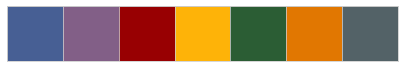

In [4]:
# import custom palette
import my_palette as mp

In [5]:
# set option for palette argument
my_palette = ['xkcd:' + c for c in mp.my_colors]

In [6]:
# read in dataset
df = pd.read_json('../data/capstone2_ds.json')

In [7]:
# observe dataset dimensionality
df.shape

(11693, 28)

In [8]:
# change gender labels to be human readable
df['gender'].replace([0, 1], ['male', 'female'], inplace=True)

In [9]:
# observe a bit of the data
df.iloc[:3, :11]

,revenue,budget,age,gender,order,popularity,release_date,runtime,usa,vote_average,vote_count
2,1.032727e+09,8.725710e+07,46.683803,male,0.818182,44.132909,1997.818182,112.818182,1,7.145455,6030.272727
3,4.376895e+08,8.557983e+07,55.134863,male,0.761905,25.411429,1997.190476,119.000000,1,6.730952,2992.928571
4,7.803955e+08,7.547966e+07,40.177873,female,3.000000,32.998267,1996.466667,115.200000,1,6.660000,4516.866667


I will categorize the actors with respect to their earning history.<br>
Top actors will be the upper 10% of the profitability figures.<br>
Elite actors will be the top 1% of that category.<br>
I will use the full dataset as the third category to include all actors.<br>
For clarity, elite actors are included in the top tier as well.

In [10]:
# extract top profitable actors
top_df = df[df['revenue'] >= df['revenue'].quantile(0.9)]

In [11]:
# extract elite profitable actors
elite_df = df[df['revenue'] >= df['revenue'].quantile(0.99)]

In [12]:
# recall features
df.columns

Index(['revenue', 'budget', 'age', 'gender', 'order', 'popularity',
       'release_date', 'runtime', 'usa', 'vote_average', 'vote_count',
       'action', 'adventure', 'animation', 'comedy', 'crime', 'drama',
       'family', 'fantasy', 'history', 'horror', 'music', 'mystery', 'romance',
       'science_fiction', 'thriller', 'war', 'western'],
      dtype='object')

As movie genres were derived from aggregated sums, as opposed to averages, I will observe their statistics, separately.

In [13]:
# create list of non-genre feature names
non_genre_lst = ['revenue', 'budget', 'age', 'gender', 'order', 'popularity',
                 'release_date', 'runtime', 'usa', 'vote_average', 'vote_count']

In [14]:
# create list of genre feature names
genre_lst = np.setdiff1d(df.columns, non_genre_lst)

I will observe the non-genre statistics, first.

In [15]:
# observe non-genre statistics for all actors
df[non_genre_lst].describe(
    percentiles=[0.5]).drop('count').T.apply(
    lambda x: np.round(x, decimals=2))

,mean,std,min,50%,max
revenue,1.386641e+08,2.847504e+08,1.24,75897223.77,7.377968e+09
budget,3.952939e+07,3.619484e+07,1.60,31313680.34,3.196471e+08
age,3.786000e+01,1.400000e+01,1.18,36.15,9.896000e+01
order,4.420000e+00,2.110000e+00,0.00,4.50,8.000000e+00
popularity,1.326000e+01,8.070000e+00,0.60,12.87,2.052800e+02
release_date,1.996120e+03,2.029000e+01,1913.00,2002.60,2.020000e+03
runtime,1.079500e+02,1.764000e+01,70.00,105.67,2.480000e+02
usa,4.500000e-01,5.000000e-01,0.00,0.00,1.000000e+00
vote_average,6.400000e+00,8.400000e-01,1.00,6.40,1.000000e+01
vote_count,1.309310e+03,1.735880e+03,1.00,726.00,2.261300e+04


The average movie revenue across all actors is $138,664,100.

In [16]:
# observe non-genre statistics for top profitable actors
top_df[non_genre_lst].describe(
    percentiles=[0.5]).drop('count').T.apply(
    lambda x: np.round(x, decimals=2))

,mean,std,min,50%,max
revenue,6.354168e+08,6.969294e+08,2.985497e+08,4.347634e+08,7.377968e+09
budget,8.633366e+07,5.575013e+07,9.290282e+04,7.949849e+07,3.196471e+08
age,3.883000e+01,1.486000e+01,7.130000e+00,3.790000e+01,8.738000e+01
order,4.560000e+00,2.110000e+00,0.000000e+00,4.750000e+00,8.000000e+00
popularity,2.140000e+01,9.680000e+00,6.200000e-01,2.020000e+01,1.519100e+02
release_date,1.993010e+03,2.177000e+01,1.925000e+03,1.998880e+03,2.019000e+03
runtime,1.179500e+02,2.343000e+01,7.000000e+01,1.160000e+02,2.480000e+02
usa,4.000000e-01,4.900000e-01,0.000000e+00,0.000000e+00,1.000000e+00
vote_average,6.830000e+00,6.300000e-01,4.300000e+00,6.800000e+00,8.600000e+00
vote_count,3.940060e+03,3.117690e+03,5.500000e+01,3.465000e+03,2.261300e+04


The revenue cut off value is $298,549,700 to be considered a top actor.

The average movie revenue for this group is $635,416,800.

In [17]:
# observe non-genre statistics for elite profitable actors
elite_df[non_genre_lst].describe(
    percentiles=[0.5]).drop('count').T.apply(
    lambda x: np.round(x, decimals=2))

,mean,std,min,50%,max
revenue,2.130374e+09,1.469897e+09,9.613917e+08,1.554221e+09,7.377968e+09
budget,8.490262e+07,7.376764e+07,1.342198e+07,4.793564e+07,3.196471e+08
age,3.780000e+01,1.741000e+01,7.990000e+00,3.601000e+01,8.738000e+01
order,4.330000e+00,2.430000e+00,0.000000e+00,4.000000e+00,8.000000e+00
popularity,2.876000e+01,1.639000e+01,9.460000e+00,2.437000e+01,1.519100e+02
release_date,1.972850e+03,2.799000e+01,1.938000e+03,1.965000e+03,2.019000e+03
runtime,1.187700e+02,3.999000e+01,7.000000e+01,1.180000e+02,2.330000e+02
usa,4.200000e-01,5.000000e-01,0.000000e+00,0.000000e+00,1.000000e+00
vote_average,7.220000e+00,4.600000e-01,5.700000e+00,7.100000e+00,8.300000e+00
vote_count,5.493990e+03,3.633770e+03,4.564300e+02,4.399000e+03,1.679400e+04


The revenue cut off value is $961,391,700 to be considered an elite actor.

The average movie revenue for this group is $2,130,374,000.

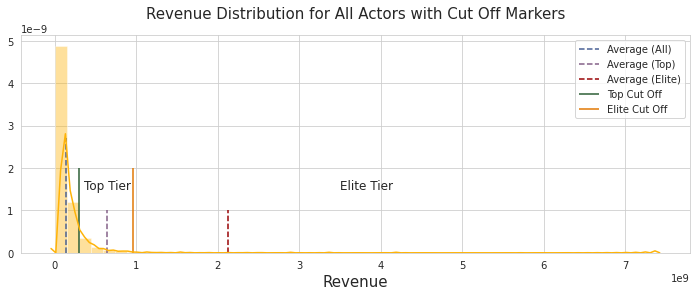

In [18]:
# plot revenue distribution, showing ranges of actor tiers

plt.text(3.5e8, 1.5e-9, 'Top Tier', fontsize=12)
plt.text(3.5e9, 1.5e-9, 'Elite Tier', fontsize=12)

plt.vlines(x=np.mean(df['revenue']), ymin=0, ymax=2.7e-9, color=mp.colors(0), 
           label='Average (All)', linestyles='dashed')
plt.vlines(x=np.mean(top_df['revenue']), ymin=0, ymax=1e-9, color=mp.colors(1), 
           label='Average (Top)', linestyles='dashed')
plt.vlines(x=np.mean(elite_df['revenue']), ymin=0, ymax=1e-9, color=mp.colors(2), 
           label='Average (Elite)', linestyles='dashed')
plt.vlines(x=np.min(top_df['revenue']), ymin=0, ymax=2e-9, color=mp.colors(4), 
           label='Top Cut Off')
plt.vlines(x=np.min(elite_df['revenue']), ymin=0, ymax=2e-9, color=mp.colors(5), 
           label='Elite Cut Off')
sns.distplot(df['revenue'], color=mp.colors(3))

plt.xlabel('Revenue', fontsize='15')

plt.legend()
plt.title('Revenue Distribution for All Actors with Cut Off Markers', 
          fontsize=15, y=1.05);

The elite tier covers the widest range of revenues.

Now, I'll observe the genre statistics.

In [19]:
# observe genre statistics for all actors
df[genre_lst].describe(
    percentiles=[0.5]).drop('count').T.apply(
    lambda x: np.round(x, decimals=2))

,mean,std,min,50%,max
action,0.97,1.98,0.0,0.0,38.0
adventure,0.67,1.44,0.0,0.0,23.0
animation,0.18,0.66,0.0,0.0,11.0
comedy,1.28,2.49,0.0,1.0,34.0
crime,0.58,1.36,0.0,0.0,27.0
drama,1.64,2.81,0.0,1.0,33.0
family,0.38,0.98,0.0,0.0,15.0
fantasy,0.36,0.90,0.0,0.0,17.0
history,0.16,0.52,0.0,0.0,9.0
horror,0.40,0.77,0.0,0.0,11.0


There was one actor who was in 38 action films.

I'll import the dataset, as it was before aggregation, to find specific actors and movies.

In [20]:
# read in full actor reference dataset
actor_df = pd.read_json('../data/capstone2_ref.json')
actor_df.head(8)

,person_id,name,movie_id,title,revenue,budget,profit,age,gender,order,...,fantasy,history,horror,music,mystery,romance,science_fiction,thriller,war,western
0,2,Mark Hamill,16121,The Big Red One,2.273880e+07,1.419948e+07,8.539315e+06,28.674100,0,1,...,0,0,0,0,0,0,0,0,1,0
1,2,Mark Hamill,11,Star Wars,3.319102e+09,4.708566e+07,3.272016e+09,25.665140,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2,Mark Hamill,14919,Batman: Mask of the Phantasm,9.944670e+06,1.062202e+07,-6.773465e+05,42.251381,0,1,...,0,0,0,0,1,0,0,1,0,0
3,2,Mark Hamill,1892,Return of the Jedi,1.490146e+09,8.417359e+07,1.405972e+09,31.663895,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2,Mark Hamill,16220,Wizards,3.930685e+07,5.240914e+06,3.406594e+07,25.377660,0,4,...,1,0,0,0,0,0,1,0,0,0
5,2,Mark Hamill,1891,The Empire Strikes Back,1.698889e+09,5.679792e+07,1.642091e+09,28.652197,0,0,...,0,0,0,0,0,0,1,0,0,0
6,2,Mark Hamill,140607,Star Wars: The Force Awakens,2.257011e+09,2.673636e+08,1.989647e+09,64.223085,0,1,...,1,0,0,0,0,0,1,0,0,0
7,2,Mark Hamill,181808,Star Wars: The Last Jedi,1.395193e+09,2.094035e+08,1.185789e+09,66.219019,0,0,...,0,0,0,0,0,0,1,0,0,0


In [21]:
# get name of actor in 38 action movies
actor_df[actor_df['person_id'].isin(
    df[df['action'] == 38].index)]['name'].unique().tolist()

['Samuel L. Jackson']

In [22]:
# observe genre statistics for top profitable actors
top_df[genre_lst].describe(
    percentiles=[0.5]).drop('count').T.apply(
    lambda x: np.round(x, decimals=2))

,mean,std,min,50%,max
action,1.33,2.61,0.0,1.0,38.0
adventure,1.42,2.29,0.0,1.0,23.0
animation,0.44,1.01,0.0,0.0,8.0
comedy,1.19,2.45,0.0,0.0,32.0
crime,0.41,1.28,0.0,0.0,24.0
drama,1.36,2.75,0.0,1.0,28.0
family,0.70,1.37,0.0,0.0,11.0
fantasy,0.71,1.45,0.0,0.0,17.0
history,0.17,0.58,0.0,0.0,7.0
horror,0.24,0.57,0.0,0.0,6.0


It was more likely than not that a top actor was is an action film.<br>
The same could be said for adventure films.

In [23]:
# observe genre statistics for elite actors
elite_df[genre_lst].describe(
    percentiles=[0.5]).drop('count').T.apply(
    lambda x: np.round(x, decimals=2))

,mean,std,min,50%,max
action,0.51,1.10,0.0,0.0,8.0
adventure,0.93,1.31,0.0,1.0,8.0
animation,0.58,0.83,0.0,0.0,5.0
comedy,0.19,0.43,0.0,0.0,2.0
crime,0.03,0.22,0.0,0.0,2.0
drama,0.40,0.96,0.0,0.0,6.0
family,0.70,0.84,0.0,1.0,5.0
fantasy,0.49,0.99,0.0,0.0,8.0
history,0.04,0.24,0.0,0.0,2.0
horror,0.12,0.38,0.0,0.0,2.0


There was a 93% chance that an elite actor was in an adventure film.

One elite actor was in 8 fantasy movies.

In [24]:
# get name of actor in 38 action movies
actor_df[actor_df['person_id'].isin(
    elite_df[elite_df['fantasy'] == 8].index)]['name'].unique().tolist()

['Rupert Grint']

Rupert Grint played Ron Weasley throughout the entire Harry Potter series.

There are some trends in the data.<br>
I will explore a few of them with visualizations.

 > **Rating Score/Revenue (by Gender)**

I will generate Pearson correlation coefficients and 95% confidence intervals to back up my observations.

In [25]:
# set DataFrame index names
df.index.name = 'all_actors'
top_df.index.name = 'top_actors'
elite_df.index.name = 'elite_actors'

In [26]:
def pearson_r(data1, data2):
    """Compute correlation coefficient between 2 arrays"""
    corr_mat = np.corrcoef(data1, data2)
    
    return corr_mat[0, 1]

In [27]:
def draw_bs_pairs(data1, data2, func, size=1):
    """Perform pairs bootstrap for a single statistic."""
    # convert Series to numpy array
    x = np.array(data1)
    y = np.array(data2)
    # get array of indices for sampling
    inds = np.arange(len(x))
    # initialize pairs replicates
    bs_replicates = np.empty(size)
    # generate pairs replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_replicates[i] = func(bs_x, bs_y)

    return bs_replicates

In [28]:
def get_tier_correlations(data_lst, col1, col2, func, size=1):
    """Return DataFrame with correlations between given variables for given datasets"""
    # instantiate default dict to hold data
    corr_dict = defaultdict(list)
    # instantiate list ot hold DataFrame names
    df_index = []
    for data in data_lst:
        # convert categorical to numeric
        data_copy = data.copy()
        data_copy['gender'] = data['gender'].replace(['male', 'female'], [0, 1])
        data = data_copy
        # get observed correlation coefficient between 2 variables
        corr_obs = np.round(
            pearson_r(data[col1], data[col2]), decimals=3)
        # get Pearson coefficients of chosen number of bootstrap replicate pairs
        corr_replicates = draw_bs_pairs(data[col1], data[col2], pearson_r, size)
        # compute Pearson coefficient with 95% confidence intervals
        conf_int = np.round(
            np.percentile(corr_replicates, [2.5, 97.5]), decimals=3)
        # store results in default dict
        corr_dict['observed_pearson'].append(corr_obs)
        corr_dict['95%_conf_interval'].append(conf_int)
        # extract index name to identify dataset
        dataset_name = data.index.name
        df_index.append(dataset_name)
    # convert default dict to DataFrame
    corr_df = pd.DataFrame(corr_dict, index=df_index)
    
    return corr_df

In [29]:
# get correlation for full dataset between revenue and average rating score
get_tier_correlations([df], 'revenue', 'vote_average', pearson_r, 10000)

,observed_pearson,95%_conf_interval
all_actors,0.17,"[0.158, 0.184]"


There is a weak correlation between revenue and average rating score in the full dataset.

In [30]:
# get correlation for full dataset between revenue and gender
get_tier_correlations([df], 'revenue', 'gender', pearson_r, 10000)

,observed_pearson,95%_conf_interval
all_actors,-0.018,"[-0.038, 0.001]"


The is almost no correlation between revenue and gender in the full dataset.

In [31]:
# get correlation for all tiers between average rating score and gender
get_tier_correlations([df], 'vote_average', 'gender', pearson_r, 10000)

,observed_pearson,95%_conf_interval
all_actors,0.004,"[-0.015, 0.023]"


The is almost no correlation between revenue and average rating score in the full dataset.

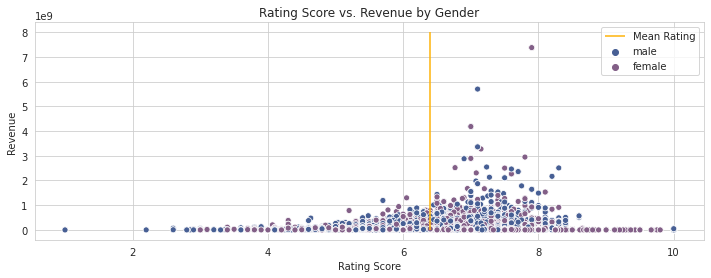

In [32]:
# plot rating score vs. revenue by gender

plt.vlines(x=np.mean(df['vote_average']), ymin=0, ymax=8e9, 
           colors=mp.colors(3), label='Mean Rating')
sns.scatterplot(x='vote_average', y='revenue', hue=df.gender.tolist(), data=df)

plt.xlabel('Rating Score')
plt.ylabel('Revenue')

plt.legend()
plt.title('Rating Score vs. Revenue by Gender');

The actors with the highest average movie revenue act in movies that have higher ratings.<br>
The actors with the largest average movie revenues are fairly well distributed between male and female actors.

 > **Budget by Tier**

In [33]:
# establish list of DataFrames to compare
df_lst = [df, top_df, elite_df]

In [34]:
# get correlation for all tiers between revenue and budget
get_tier_correlations(df_lst, 'revenue', 'budget', pearson_r, 10000)

,observed_pearson,95%_conf_interval
all_actors,0.338,"[0.298, 0.39]"
top_actors,-0.054,"[-0.104, 0.001]"
elite_actors,-0.318,"[-0.449, -0.21]"


The moderate correlation between revenue and budget goes from positive to negative, as we progress to the elite actors.

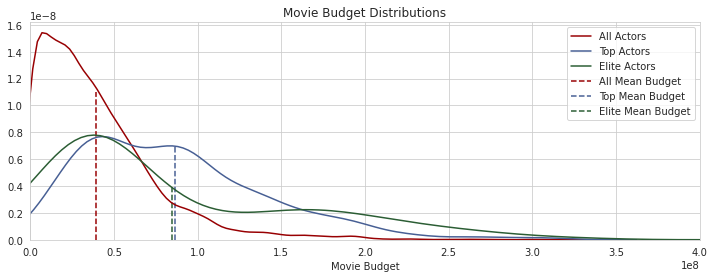

In [35]:
# plot movie budget distributions for actor classes

plt.xlim(0, 4e8)

plt.vlines(x=np.mean(df['budget']), ymin=0, ymax=1.1e-8, color=mp.colors(2), 
           label='All Mean Budget', linestyles='dashed')
sns.kdeplot(df['budget'],color=mp.colors(2), label='All Actors')

plt.vlines(x=np.mean(top_df['budget']), ymin=0, ymax=7e-9, color=mp.colors(0), 
          label='Top Mean Budget', linestyles='dashed')
sns.kdeplot(top_df['budget'], color=mp.colors(0),label='Top Actors')

plt.vlines(x=np.mean(elite_df['budget']), ymin=0, ymax=3.9e-9, color=mp.colors(4), 
          label='Elite Mean Budget', linestyles='dashed')
sns.kdeplot(elite_df['budget'], color=mp.colors(4),label='Elite Actors')

plt.xlabel('Movie Budget')

plt.legend()
plt.title('Movie Budget Distributions');

The average movie budgets increase as we go from all actors to the other two tiers.<br>
The correlation is almost lost at the top tier and completely reversed at the elite tier.<br>
Perhaps, the highest budget movies don't have revenues that increase as steadily as the average movie.<br>
This may be a sign of diminishing returns.

Average movie budgets for both the top and elite actors are bimodal.<br>
The mean values of the movie budgets for both of those groups of actors are close to each other.<br>
The difference is that the second mode of the elite actor distribution is shifted to higher budgets.<br>
All of this shows that the elite actors are in higher budget films, but fewer of them.

 > **Age by Tier**

In [36]:
# get correlation for all tiers between revenue and age
get_tier_correlations(df_lst, 'revenue', 'age', pearson_r, 10000)

,observed_pearson,95%_conf_interval
all_actors,0.025,"[0.003, 0.048]"
top_actors,-0.034,"[-0.095, 0.031]"
elite_actors,-0.049,"[-0.195, 0.104]"


The is almost no correlation between revenue and age in any of the tiers.

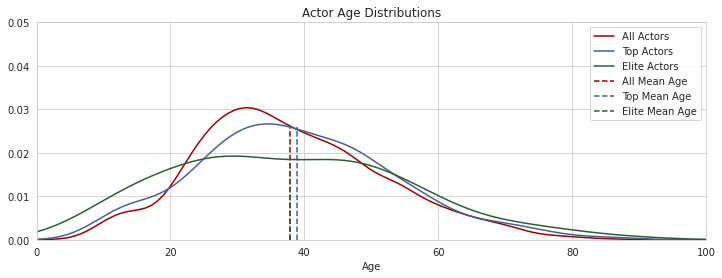

In [37]:
# plot age distributions for all actors vs. top actors

plt.xlim(0, 100)
plt.ylim(0, 0.05)

plt.vlines(x=np.mean(df['age']), ymin=0, ymax=0.026, color=mp.colors(2), 
           label='All Mean Age', linestyles='dashed')
sns.kdeplot(df['age'],color=mp.colors(2), label='All Actors')

plt.vlines(x=np.mean(top_df['age']), ymin=0, ymax=0.026, color=mp.colors(0), 
          label='Top Mean Age', linestyles='dashed')
sns.kdeplot(top_df['age'], color=mp.colors(0),label='Top Actors')

plt.vlines(x=np.mean(elite_df['age']), ymin=0, ymax=0.018, color=mp.colors(4), 
          label='Elite Mean Age', linestyles='dashed')
sns.kdeplot(elite_df['age'], color=mp.colors(4),label='Elite Actors')

plt.xlabel('Age')

plt.legend()
plt.title('Actor Age Distributions');

The average age of a top actor is slightly higher that that of an actor in one of the other tiers.<br>
They are all fairly close, though.

 > **Runtime by Tier**

In [38]:
# get correlation for all tiers between revenue and runtime
get_tier_correlations(df_lst, 'revenue', 'runtime', pearson_r, 10000)

,observed_pearson,95%_conf_interval
all_actors,0.182,"[0.125, 0.236]"
top_actors,0.095,"[-0.09, 0.257]"
elite_actors,0.201,"[-0.25, 0.468]"


The weak correlation between revenue and runtime is cut in half for the top tier, compared with the other two.

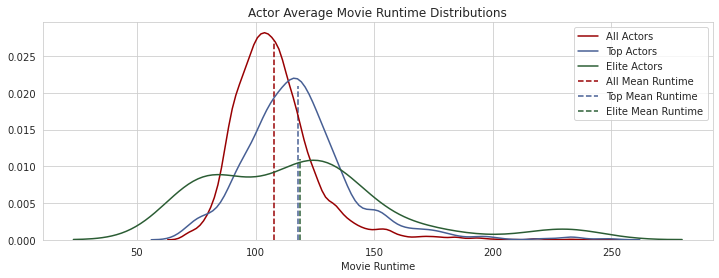

In [39]:
# plot runtime distributions for actor classes

plt.vlines(x=np.mean(df['runtime']), ymin=0, ymax=0.027, color=mp.colors(2), 
           label='All Mean Runtime', linestyles='dashed')
sns.kdeplot(df['runtime'],color=mp.colors(2), label='All Actors')

plt.vlines(x=np.mean(top_df['runtime']), ymin=0, ymax=0.021, color=mp.colors(0), 
          label='Top Mean Runtime', linestyles='dashed')
sns.kdeplot(top_df['runtime'], color=mp.colors(0),label='Top Actors')

plt.vlines(x=np.mean(elite_df['runtime']), ymin=0, ymax=0.011, color=mp.colors(4), 
          label='Elite Mean Runtime', linestyles='dashed')
sns.kdeplot(elite_df['runtime'], color=mp.colors(4),label='Elite Actors')

plt.xlabel('Movie Runtime')

plt.legend()
plt.title('Actor Average Movie Runtime Distributions');

The average runtime for all tiers of actors is constrained between an hour and a half and two hours.<br>
Elite actors have a fairly even distribution throughout the range of their average movie runtime.<br>
Their distribution has an additional mode for movies with runtimes greater than three hours.

 > **Popularity by Tier**

In [40]:
# get correlation for all tiers between revenue and popularity
get_tier_correlations(df_lst, 'revenue', 'popularity', pearson_r, 10000)

,observed_pearson,95%_conf_interval
all_actors,0.325,"[0.284, 0.377]"
top_actors,0.166,"[0.124, 0.224]"
elite_actors,-0.203,"[-0.29, -0.134]"


There is a moderate positive correlation between revenue and popularity for all actors.<br>
It becomes a weak negative correlation for the elite actors.

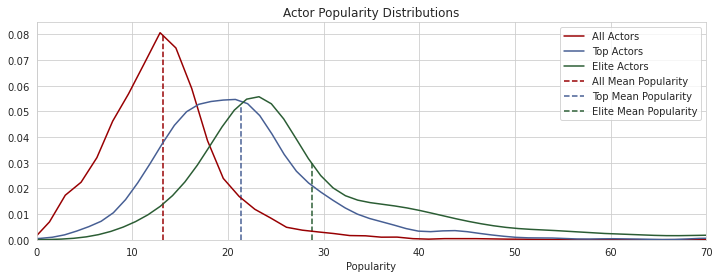

In [41]:
# plot actor popularity distributions for actor classes

plt.xlim(0, 70)

plt.vlines(x=np.mean(df['popularity']), ymin=0, ymax=0.08, color=mp.colors(2), 
           label='All Mean Popularity', linestyles='dashed')
sns.kdeplot(df['popularity'],color=mp.colors(2), label='All Actors')

plt.vlines(x=np.mean(top_df['popularity']), ymin=0, ymax=0.052, color=mp.colors(0), 
          label='Top Mean Popularity', linestyles='dashed')
sns.kdeplot(top_df['popularity'], color=mp.colors(0),label='Top Actors')

plt.vlines(x=np.mean(elite_df['popularity']), ymin=0, ymax=0.03, color=mp.colors(4), 
          label='Elite Mean Popularity', linestyles='dashed')
sns.kdeplot(elite_df['popularity'], color=mp.colors(4),label='Elite Actors')

plt.xlabel('Popularity')

plt.legend()
plt.title('Actor Popularity Distributions');

The popularity variable is a TMDb proprietary value that represents current intrest in a movie, based on website activity.<br>
The average actor popularity increases as we go from all actors to the most elite ones.

I will show the higher end of the range, below.

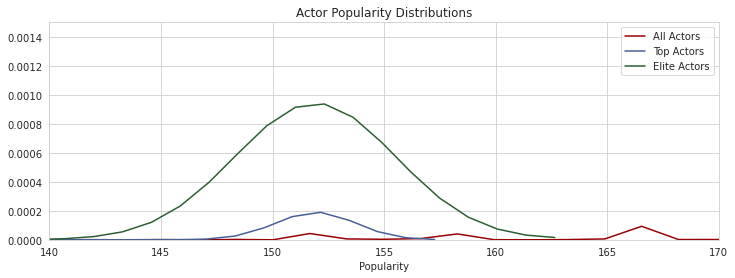

In [42]:
# plot actor high value popularity distributions for actor classes

plt.xlim(140, 170)
plt.ylim(0, 0.0015)

sns.kdeplot(df['popularity'],color=mp.colors(2), label='All Actors')

sns.kdeplot(top_df['popularity'], color=mp.colors(0),label='Top Actors')

sns.kdeplot(elite_df['popularity'], color=mp.colors(4),label='Elite Actors')


plt.xlabel('Popularity')

plt.legend()
plt.title('Actor Popularity Distributions');

Zooming in to a higher range, I can see there is a second mode in the elite distribution.

In [43]:
# extract elite actors in second mode of popularity distribution
actor_df[actor_df['person_id'].isin((
    elite_df[(elite_df['popularity'] > 140) & (
        elite_df['popularity'] < 160)].index))].drop(genre_lst, axis=1)

,person_id,name,movie_id,title,revenue,budget,profit,age,gender,order,popularity,release_date,runtime,usa,vote_average,vote_count
40459,1537686,Naomi Ackie,181812,Star Wars: The Rise of Skywalker,1.078371e+09,2.511100e+08,8.272614e+08,27.124445,1,7,151.912,2019,142,0,6.5,4399


Naomi Ackie is only in one movie in this dataset.<br>
I can see how one actor can show up as an anomoly.<br>
Given the small number of elite actors, it is not surprising that second modes are appering in their distributions.

There may be sparsity in the observations for actors with high revenue.<br>
If so, this could lead to a lower model accuracy.<br>
I will explore this further in a separate notebook by testing the effects of removing outliers from the revenue values.

 > **Rating Score by Tier**

In [44]:
# get correlation for all tiers between revenue and average rating score
get_tier_correlations(df_lst, 'revenue', 'vote_average', pearson_r, 10000)

,observed_pearson,95%_conf_interval
all_actors,0.170,"[0.158, 0.184]"
top_actors,0.238,"[0.204, 0.272]"
elite_actors,0.241,"[0.054, 0.394]"


The weak correlation between revenue and average rating score gets slightly stronger as we get to the top and elite actors.

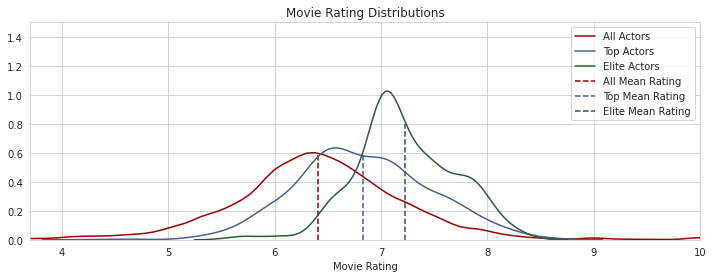

In [45]:
# plot movie rating distributions for actor classes

plt.xlim(3.7, 10)
plt.ylim(0, 1.5)

plt.vlines(x=np.mean(df['vote_average']), ymin=0, ymax=0.6, color=mp.colors(2), 
           label='All Mean Rating', linestyles='dashed')
sns.kdeplot(df['vote_average'],color=mp.colors(2), label='All Actors')

plt.vlines(x=np.mean(top_df['vote_average']), ymin=0, ymax=0.6, color=mp.colors(0), 
          label='Top Mean Rating', linestyles='dashed')
sns.kdeplot(top_df['vote_average'], color=mp.colors(0),label='Top Actors')

plt.vlines(x=np.mean(elite_df['vote_average']), ymin=0, ymax=0.8, color=mp.colors(4), 
          label='Elite Mean Rating', linestyles='dashed')
sns.kdeplot(elite_df['vote_average'], color=mp.colors(4),label='Elite Actors')

plt.xlabel('Movie Rating')

plt.legend()
plt.title('Movie Rating Distributions');

The average movie rating increases as we go from all actors to the most elite ones.<br>
This points to reviewers giving higher ratings to actors who are in higher revenue films.<br>
The distribution for all actors has a wide spread throughout the range of ratings.<br>
There is a greater uncertainty when it comes to the ratings of movies of the average actor.

 > **Number of Ratings by Tier**

In [46]:
# get correlation for all tiers between revenue and number of ratings
get_tier_correlations(df_lst, 'revenue', 'vote_count', pearson_r, 10000)

,observed_pearson,95%_conf_interval
all_actors,0.437,"[0.388, 0.496]"
top_actors,0.124,"[0.075, 0.189]"
elite_actors,-0.263,"[-0.374, -0.143]"


The moderate corelation between revenue and number of ratings becomes weak at the top tier.<br>
It changes to a weak negative correlation for the elite actors.

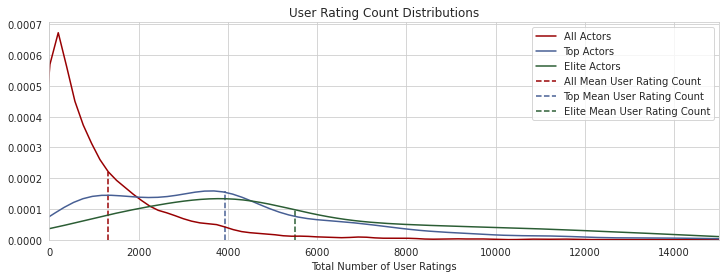

In [47]:
# plot total number of user ratings distributions for actor classes

plt.xlim(0, 15e3)

plt.vlines(x=np.mean(df['vote_count']), ymin=0, ymax=2.2e-4, color=mp.colors(2), 
           label='All Mean User Rating Count', linestyles='dashed')
sns.kdeplot(df['vote_count'],color=mp.colors(2), label='All Actors')

plt.vlines(x=np.mean(top_df['vote_count']), ymin=0, ymax=1.6e-4, color=mp.colors(0), 
          label='Top Mean User Rating Count', linestyles='dashed')
sns.kdeplot(top_df['vote_count'], color=mp.colors(0),label='Top Actors')

plt.vlines(x=np.mean(elite_df['vote_count']), ymin=0, ymax=1e-4, color=mp.colors(4), 
          label='Elite Mean User Rating Count', linestyles='dashed')
sns.kdeplot(elite_df['vote_count'], color=mp.colors(4),label='Elite Actors')

plt.xlabel('Total Number of User Ratings')

plt.legend()
plt.title('User Rating Count Distributions');

The average number of total user ratings increases as we go from all actors to the most elite ones.<br>
This supports the idea that name recognition will drive revenue numbers.<br>
This is commonly referred to as star power.

The way that the correlation switched from positive to negative for the elite actors concerns me.<br>
I get the impression that those actors will be difficult for a model to learn.<br>
Their data exhibit opposite patterns to that of the other actors.<br>
I will recheck these correlations, after outlier analysis.

There are clear trends that will be helpful for making predictions about which actors will have the highest revenue totals.

Now, I will rank the actors by their tier.

In [48]:
# create top actor binary feature
df['is_top'] = df['revenue'].transform(
    lambda x: int(x >= np.min(top_df['revenue']) ))

In [49]:
# create elite actor binary feature
df['is_elite'] = df['revenue'].transform(
    lambda x: int(x >= np.min(elite_df['revenue']) ))

In [50]:
# create actor rank feature
df['rank'] = df['is_top'] + df['is_elite']

In [51]:
# observe DataFrame without looking at genres
df.drop(genre_lst, axis=1).head(3)

,revenue,budget,age,gender,order,popularity,release_date,runtime,usa,vote_average,vote_count,is_top,is_elite,rank
all_actors,,,,,,,,,,,,,,
2,1.032727e+09,8.725710e+07,46.683803,male,0.818182,44.132909,1997.818182,112.818182,1,7.145455,6030.272727,1,1,2
3,4.376895e+08,8.557983e+07,55.134863,male,0.761905,25.411429,1997.190476,119.000000,1,6.730952,2992.928571,1,0,1
4,7.803955e+08,7.547966e+07,40.177873,female,3.000000,32.998267,1996.466667,115.200000,1,6.660000,4516.866667,1,0,1


The newly created rank feature has values of 2 for the elite 1%, 1 for top 10%, and 0 for all other actors.<br>
Note that rank 1 does not include the top 1% of actors, unlike the previous top tier did.<br>
This is the main difference between the groupings.

In [52]:
# combine genres into feature and sum over each tier of actors
genre_count_df = pd.melt(df, 
                   id_vars=['gender', 'is_top', 'is_elite'], 
                   value_vars = genre_lst, 
                   var_name = 'genre', 
                   value_name = 'all_actors')

In [53]:
# drop observations without genre
genre_count_df = genre_count_df.loc[genre_count_df['all_actors'] > 0]

In [54]:
# group tiered actors by genres of their films
genre_count_df = genre_count_df.groupby('genre', as_index=False).agg(sum)

In [55]:
# observe DataFrame
genre_count_df.head(3)

,genre,is_top,is_elite,all_actors
0,action,617,36,11377
1,adventure,692,68,7881
2,animation,296,53,2117


Now, I have the actors grouped by their movie genres and tiers.<br>
I will plot the counts of actors over the movie genres by actor tier.

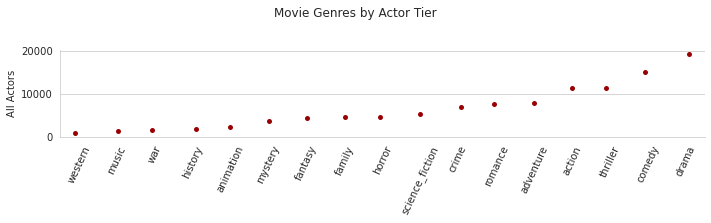

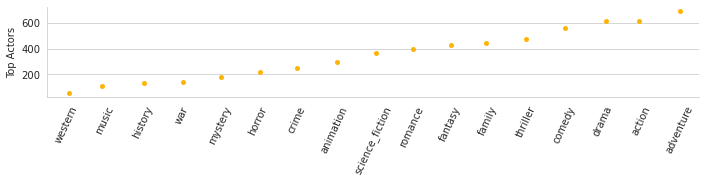

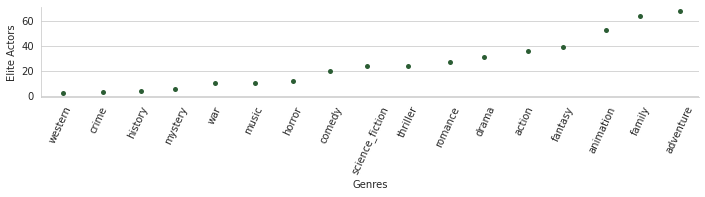

In [56]:
# plot genres by actor ranks

ax = sns.catplot(data=genre_count_df.sort_values('all_actors'), 
                 x='genre', y='all_actors', height=2, aspect=5, 
                 color=mp.colors(2), label='All Actors').set_xticklabels(rotation=65)
plt.xlabel('')
plt.ylabel('All Actors')

sns.catplot(data=genre_count_df.sort_values('is_top'), x='genre', y='is_top', 
            height=2, aspect=5, color=mp.colors(3)).set_xticklabels(rotation=65)
plt.xlabel('')
plt.ylabel('Top Actors')

sns.catplot(data=genre_count_df.sort_values('is_elite'), x='genre', y='is_elite', 
            height=2, aspect=5, color=mp.colors(4)).set_xticklabels(rotation=65)
plt.xlabel('Genres')
plt.ylabel('Elite Actors')

ax.fig.suptitle('Movie Genres by Actor Tier', y=1.2);

The importances of comedy and drama movies decline once we get to the elite actors.<br>
Western, war, and history movies are consistantly at the bottom of earning options for any tiered actor.

Three genres are elevated by the elite tier actors: adventure, family, and animation.

At this point, I would like to dissect some of the observations in the elite tier.<br>
I am concerned that the data is unbalanced when it comes to the types of actors and movies in the highest revenue range.

In [57]:
def sort_elite_genre(genre, least_num_movies=1, gender=''):
    """Return DataFrame of elite actors in multiple mopvies of chosen genre"""
    # remove gender not selected
    if gender == 'female':
        gender_df = actor_df[actor_df['gender'] == 1]
    elif gender == 'male':
        gender_df = actor_df[actor_df['gender'] == 0]
    else:
        gender_df = actor_df.copy()
    # extract elite actors in more than 1 movie of the chosen genre
    multiple_movies_df = gender_df[gender_df['person_id'].isin(
        elite_df[elite_df[genre] >= least_num_movies].index)]
    # sort by revenue and drop movies not in genre category
    elite_genre_df = multiple_movies_df[multiple_movies_df[genre] > 0].drop(
        genre_lst, axis=1).sort_values(
        'revenue', ascending=False)
    # get count of elite actors in multiple movies in genre
    num_multiple_elite = len(
        multiple_movies_df[multiple_movies_df[genre] > 0]['name'].unique())
    # get DataFrame of elite actors in at least one movie in genre
    any_movies_df = gender_df[gender_df['person_id'].isin(
        elite_df[elite_df[genre] > 0].index)]
    # get count of elite actors in at least one movie in genre
    num_elite = len(
        any_movies_df[any_movies_df[genre] > 0]['name'].unique())
    word = genre.split('_')
    if len(word) > 1:
        genre = word[0] + ' ' + word[1]
    if gender != '':
        gender = gender + ' '
    if least_num_movies >= 2:
        print(
            num_multiple_elite, 'out of', 
            num_elite, 'elite ' + gender + 'actors in', genre, 'films, were in at least', 
            least_num_movies, 'of them.')
    else:
        print(
            num_elite, 'elite ' + gender + 'actors were in at least one', genre, 'film.')
    
    return elite_genre_df

In [58]:
# show elite actors appearing in movies by genre
sort_elite_genre('adventure', least_num_movies=3)

8 out of 68 elite actors in adventure films, were in at least 3 of them.


,person_id,name,movie_id,title,revenue,budget,profit,age,gender,order,popularity,release_date,runtime,usa,vote_average,vote_count
26924,34759,Sterling Holloway,12092,Alice in Wonderland,5.700455e+09,2.989749e+07,5.670557e+09,46.560847,0,3,28.816,1951,75,1,7.1,3949
72,6,Anthony Daniels,11,Star Wars,3.319102e+09,4.708566e+07,3.272016e+09,31.255946,0,5,90.645,1977,121,0,8.2,13502
24614,24343,Peter Mayhew,11,Star Wars,3.319102e+09,4.708566e+07,3.272016e+09,33.016421,0,7,90.645,1977,121,0,8.2,13502
701,130,Kenny Baker,11,Star Wars,3.319102e+09,4.708566e+07,3.272016e+09,42.752418,0,6,90.645,1977,121,0,8.2,13502
1,2,Mark Hamill,11,Star Wars,3.319102e+09,4.708566e+07,3.272016e+09,25.665140,0,0,90.645,1977,121,1,8.2,13502
40090,1315036,Daisy Ridley,140607,Star Wars: The Force Awakens,2.257011e+09,2.673636e+08,1.989647e+09,23.680158,1,4,50.161,2015,136,0,7.4,14329
6,2,Mark Hamill,140607,Star Wars: The Force Awakens,2.257011e+09,2.673636e+08,1.989647e+09,64.223085,0,1,50.161,2015,136,1,7.4,14329
73,6,Anthony Daniels,1891,The Empire Strikes Back,1.698889e+09,5.679792e+07,1.642091e+09,34.243003,0,4,35.358,1980,124,0,8.4,11403
5,2,Mark Hamill,1891,The Empire Strikes Back,1.698889e+09,5.679792e+07,1.642091e+09,28.652197,0,0,35.358,1980,124,1,8.4,11403
702,130,Kenny Baker,1891,The Empire Strikes Back,1.698889e+09,5.679792e+07,1.642091e+09,45.739474,0,8,35.358,1980,124,0,8.4,11403


Some big adventure series movies can be credited with the prominence of this genre with the elite actors.<br>
Dominic Monaghan was in two of them, X-Men and The Lord of the Rings.<br>
I would prefer to see fewer actors, who rely on the inretia of a blockbuster series, being used for model training.<br>
This supports the idea of exploring outlier removal, possibly with respect to movie revenue.

In [59]:
# show elite actors appearing in movies by genre
sort_elite_genre('action', least_num_movies=3)

5 out of 36 elite actors in action films, were in at least 3 of them.


,person_id,name,movie_id,title,revenue,budget,profit,age,gender,order,popularity,release_date,runtime,usa,vote_average,vote_count
1,2,Mark Hamill,11,Star Wars,3.319102e+09,4.708566e+07,3.272016e+09,25.665140,0,0,90.645,1977,121,1,8.2,13502
24614,24343,Peter Mayhew,11,Star Wars,3.319102e+09,4.708566e+07,3.272016e+09,33.016421,0,7,90.645,1977,121,0,8.2,13502
72,6,Anthony Daniels,11,Star Wars,3.319102e+09,4.708566e+07,3.272016e+09,31.255946,0,5,90.645,1977,121,0,8.2,13502
6,2,Mark Hamill,140607,Star Wars: The Force Awakens,2.257011e+09,2.673636e+08,1.989647e+09,64.223085,0,1,50.161,2015,136,1,7.4,14329
40090,1315036,Daisy Ridley,140607,Star Wars: The Force Awakens,2.257011e+09,2.673636e+08,1.989647e+09,23.680158,1,4,50.161,2015,136,0,7.4,14329
5,2,Mark Hamill,1891,The Empire Strikes Back,1.698889e+09,5.679792e+07,1.642091e+09,28.652197,0,0,35.358,1980,124,1,8.4,11403
73,6,Anthony Daniels,1891,The Empire Strikes Back,1.698889e+09,5.679792e+07,1.642091e+09,34.243003,0,4,35.358,1980,124,0,8.4,11403
24613,24343,Peter Mayhew,1891,The Empire Strikes Back,1.698889e+09,5.679792e+07,1.642091e+09,36.003477,0,7,35.358,1980,124,0,8.4,11403
4149,1330,Dominic Monaghan,122,The Lord of the Rings: The Return of the King,1.567021e+09,1.316485e+08,1.435373e+09,26.979336,0,7,44.250,2003,201,0,8.4,15333
76,6,Anthony Daniels,1892,Return of the Jedi,1.490146e+09,8.417359e+07,1.405972e+09,37.254701,0,4,33.089,1983,135,0,8.0,9505


The action and adventure genres have a lot of cross-over.<br>
I suspect that there are other genres, which are pairing together in a similar manner.

In [60]:
# show elite actors appearing in movies by genre
sort_elite_genre('family', least_num_movies=3)

4 out of 64 elite actors in family films, were in at least 3 of them.


,person_id,name,movie_id,title,revenue,budget,profit,age,gender,order,popularity,release_date,runtime,usa,vote_average,vote_count
25768,29283,Richard Haydn,12092,Alice in Wonderland,5.700455e+09,2.989749e+07,5.670557e+09,46.382883,0,2,28.816,1951,75,0,7.1,3949
26924,34759,Sterling Holloway,12092,Alice in Wonderland,5.700455e+09,2.989749e+07,5.670557e+09,46.560847,0,3,28.816,1951,75,1,7.1,3949
32955,67230,Bill Thompson,12092,Alice in Wonderland,5.700455e+09,2.989749e+07,5.670557e+09,38.054169,0,7,28.816,1951,75,1,7.1,3949
32966,67290,Verna Felton,12092,Alice in Wonderland,5.700455e+09,2.989749e+07,5.670557e+09,61.019733,1,5,28.816,1951,75,1,7.1,3949
32967,67290,Verna Felton,11224,Cinderella,2.895187e+09,3.185249e+07,2.863335e+09,59.593284,1,2,23.993,1950,74,1,7.0,4411
25769,29283,Richard Haydn,15121,The Sound of Music,2.360262e+09,6.762118e+07,2.292641e+09,60.053252,0,3,18.195,1965,175,0,7.7,1971
26923,34759,Sterling Holloway,9325,The Jungle Book,1.576597e+09,3.063680e+07,1.545960e+09,62.785683,0,4,22.601,1967,78,1,7.3,4275
32964,67290,Verna Felton,9325,The Jungle Book,1.576597e+09,3.063680e+07,1.545960e+09,77.244570,1,7,22.601,1967,78,1,7.3,4275
32957,67230,Bill Thompson,10340,Lady and the Tramp,9.080756e+08,3.866891e+07,8.694067e+08,41.955687,0,3,26.949,1955,76,1,7.1,3439
32965,67290,Verna Felton,10340,Lady and the Tramp,9.080756e+08,3.866891e+07,8.694067e+08,64.921251,1,6,26.949,1955,76,1,7.1,3439


Most of these films are Disney animation from last century.<br>
The voice actors in them were recycled through the films.

In [61]:
# show elite actors appearing in movies by genre
sort_elite_genre('animation', least_num_movies=3)

4 out of 53 elite actors in animation films, were in at least 3 of them.


,person_id,name,movie_id,title,revenue,budget,profit,age,gender,order,popularity,release_date,runtime,usa,vote_average,vote_count
26924,34759,Sterling Holloway,12092,Alice in Wonderland,5.700455e+09,2.989749e+07,5.670557e+09,46.560847,0,3,28.816,1951,75,1,7.1,3949
32955,67230,Bill Thompson,12092,Alice in Wonderland,5.700455e+09,2.989749e+07,5.670557e+09,38.054169,0,7,28.816,1951,75,1,7.1,3949
32966,67290,Verna Felton,12092,Alice in Wonderland,5.700455e+09,2.989749e+07,5.670557e+09,61.019733,1,5,28.816,1951,75,1,7.1,3949
32967,67290,Verna Felton,11224,Cinderella,2.895187e+09,3.185249e+07,2.863335e+09,59.593284,1,2,23.993,1950,74,1,7.0,4411
26923,34759,Sterling Holloway,9325,The Jungle Book,1.576597e+09,3.063680e+07,1.545960e+09,62.785683,0,4,22.601,1967,78,1,7.3,4275
32964,67290,Verna Felton,9325,The Jungle Book,1.576597e+09,3.063680e+07,1.545960e+09,77.244570,1,7,22.601,1967,78,1,7.3,4275
32957,67230,Bill Thompson,10340,Lady and the Tramp,9.080756e+08,3.866891e+07,8.694067e+08,41.955687,0,3,26.949,1955,76,1,7.1,3439
32965,67290,Verna Felton,10340,Lady and the Tramp,9.080756e+08,3.866891e+07,8.694067e+08,64.921251,1,6,26.949,1955,76,1,7.1,3439
32956,67230,Bill Thompson,10693,Peter Pan,8.513378e+08,3.896075e+07,8.123770e+08,39.581922,0,3,27.362,1953,77,1,7.2,3593
32958,67230,Bill Thompson,10882,Sleeping Beauty,4.554971e+08,5.358789e+07,4.019092e+08,45.613531,0,7,24.178,1959,75,1,6.9,3465


Big revenue animation movies are generally family movies.<br>
This is another example of genre pairs that consist of the same movies.<br>
I will explore this in a later notebook.

Finally, I will bring gender into fold, while still counting the actors over the genres.

In [62]:
# combine genres into feature and sum over all actors
gender_rank_df = pd.melt(df, 
                   id_vars=['gender', 'rank'], 
                   value_vars = genre_lst, 
                   var_name = 'genre', 
                   value_name = 'count')

In [63]:
# drop observations without genre
gender_rank_df = gender_rank_df.loc[gender_rank_df['count'] > 0]

In [64]:
# observe DataFrame
gender_rank_df.head()

,gender,rank,genre,count
0,male,2,action,8
1,male,1,action,18
2,female,1,action,6
3,male,2,action,1
4,male,2,action,5


Now, I have the actors grouped by their movie genres, genders, and ranks.

In [65]:
def plot_genres():
    """Plot distribution of genres by actor rank and gender"""
    sns.set(font_scale=6)
    
    g = sns.catplot(x='genre', hue='gender', row='rank', data=gender_rank_df, 
                    kind='count', sharey=False, height=10, aspect=4, 
                    palette=my_palette[:2])
    
    g.set_xticklabels(fontsize=50, rotation=70)

    plt.xlabel('Genre', fontsize=80)

    g.fig.suptitle('Movie Genres by Actor Rank', y=1.03)

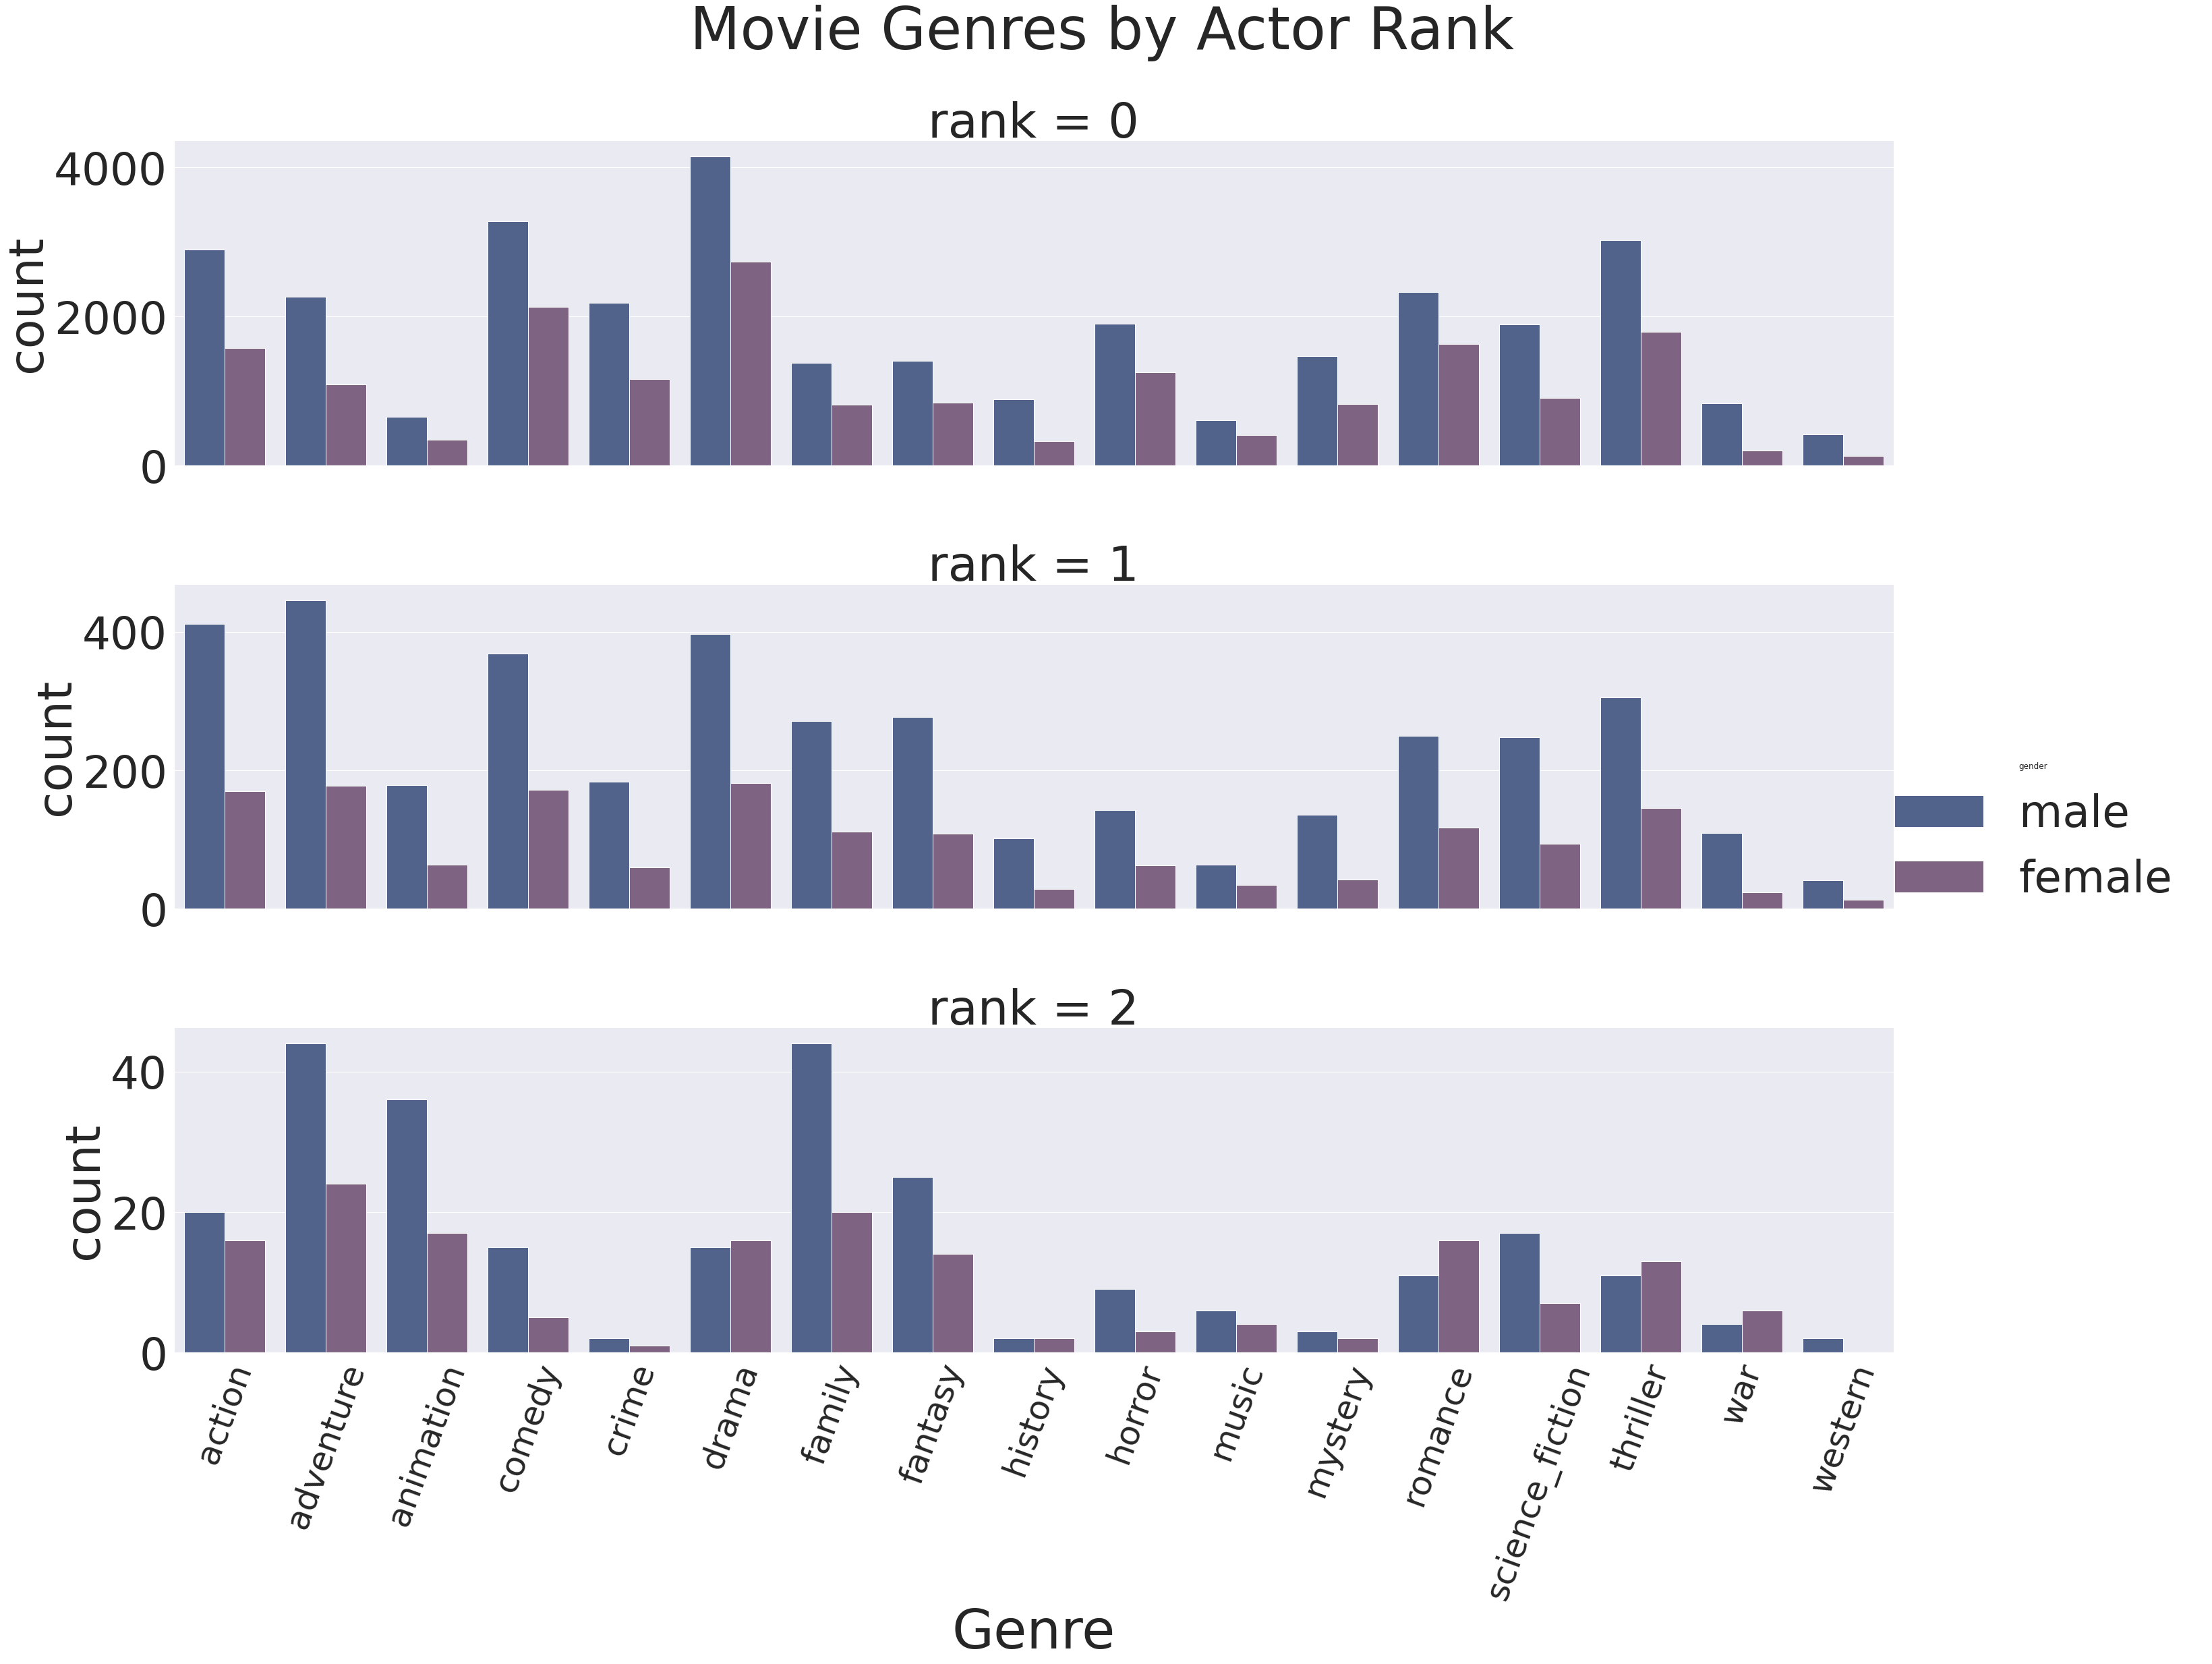

In [66]:
# plot distributions of genres by actor rank and gender
plot_genres()

The genres of adventure, animation, and family are the most dominant ones among the rank 2 actors.<br>
Rank 0 actors tend to have roles in action, comedy, drama, and thriller movies.<br>
These two observations can be seen in the previous plot, as well.

The proportion of female actors by genre is fairly consistant in ranks 0 and 1.<br>
For rank 2 actors, they outnumber the male actors in the genres of drama, romance, thriller, and war.<br>
I will observe some of the elite female actor roles.

In [67]:
# show elite actors appearing in movies by genre
sort_elite_genre('war', gender='female')

6 elite female actors were in at least one war film.


,person_id,name,movie_id,title,revenue,budget,profit,age,gender,order,popularity,release_date,runtime,usa,vote_average,vote_count
13204,7642,Barbara O'Neil,770,Gone with the Wind,7.377968e+09,7.374714e+07,7.304220e+09,29.413335,1,6,19.986,1939,233,1,7.9,2207
13993,8725,Olivia de Havilland,770,Gone with the Wind,7.377968e+09,7.374714e+07,7.304220e+09,23.455649,1,2,19.986,1939,233,0,7.9,2207
15782,10538,Vivien Leigh,770,Gone with the Wind,7.377968e+09,7.374714e+07,7.304220e+09,26.108681,1,0,19.986,1939,233,0,7.9,2207
17001,11494,Evelyn Keyes,770,Gone with the Wind,7.377968e+09,7.374714e+07,7.304220e+09,23.066867,1,7,19.986,1939,233,1,7.9,2207
17002,11495,Ann Rutherford,770,Gone with the Wind,7.377968e+09,7.374714e+07,7.304220e+09,22.116813,1,8,19.986,1939,233,0,7.9,2207
17003,11498,Hattie McDaniel,770,Gone with the Wind,7.377968e+09,7.374714e+07,7.304220e+09,44.512892,1,4,19.986,1939,233,1,7.9,2207
13994,8725,Olivia de Havilland,43884,The Charge of the Light Brigade,5.044305e+07,2.212414e+07,2.831890e+07,20.304318,1,1,5.895,1936,115,0,6.7,33


There were many rank 2 female actors in Gone with the Wind.<br>
There is, most likely, nothing that can be done to improve this genre, as it is thinly distributed in the datset.

In [68]:
# show elite actors appearing in movies by genre
sort_elite_genre('drama', gender='female')

16 elite female actors were in at least one drama film.


,person_id,name,movie_id,title,revenue,budget,profit,age,gender,order,popularity,release_date,runtime,usa,vote_average,vote_count
17002,11495,Ann Rutherford,770,Gone with the Wind,7.377968e+09,7.374714e+07,7.304220e+09,22.116813,1,8,19.986,1939,233,0,7.9,2207
17003,11498,Hattie McDaniel,770,Gone with the Wind,7.377968e+09,7.374714e+07,7.304220e+09,44.512892,1,4,19.986,1939,233,1,7.9,2207
13993,8725,Olivia de Havilland,770,Gone with the Wind,7.377968e+09,7.374714e+07,7.304220e+09,23.455649,1,2,19.986,1939,233,0,7.9,2207
15782,10538,Vivien Leigh,770,Gone with the Wind,7.377968e+09,7.374714e+07,7.304220e+09,26.108681,1,0,19.986,1939,233,0,7.9,2207
17001,11494,Evelyn Keyes,770,Gone with the Wind,7.377968e+09,7.374714e+07,7.304220e+09,23.066867,1,7,19.986,1939,233,1,7.9,2207
13204,7642,Barbara O'Neil,770,Gone with the Wind,7.377968e+09,7.374714e+07,7.304220e+09,29.413335,1,6,19.986,1939,233,1,7.9,2207
36293,107445,Ann Gillis,3170,Bambi,4.183765e+09,1.342198e+07,4.170343e+09,15.502029,1,6,23.122,1942,70,1,7.0,3691
17006,11503,Cammie King,3170,Bambi,4.183765e+09,1.342198e+07,4.170343e+09,8.024805,1,3,23.122,1942,70,1,7.0,3691
13835,8535,Gloria Stuart,597,Titanic,2.948799e+09,3.196471e+08,2.629152e+09,87.377564,1,5,33.029,1997,194,1,7.8,16794
36843,121640,Angela Cartwright,15121,The Sound of Music,2.360262e+09,6.762118e+07,2.292641e+09,12.550566,1,8,18.195,1965,175,0,7.7,1971


The drama genre has a little more variety, as it holds more samples.

In [69]:
# show elite actors appearing in movies by genre
sort_elite_genre('thriller', gender='female')

13 elite female actors were in at least one thriller film.


,person_id,name,movie_id,title,revenue,budget,profit,age,gender,order,popularity,release_date,runtime,usa,vote_average,vote_count
13886,8613,Lee Fierro,578,Jaws,2.266466e+09,3.370905e+07,2.232757e+09,46.341814,1,8,27.558,1975,124,1,7.6,6141
39904,1251069,Nathalie Emmanuel,337339,The Fate of the Furious,1.307617e+09,2.638954e+08,1.043722e+09,28.027954,1,8,30.896,2017,136,0,6.9,7223
39229,1030261,Bérénice Marlohe,37724,Skyfall,1.236987e+09,2.231699e+08,1.013818e+09,33.438058,1,5,24.466,2012,143,0,7.1,11539
15220,9919,Claudine Auger,660,Thunderball,1.146060e+09,4.464253e+07,1.101418e+09,24.627474,1,1,25.442,1965,130,0,6.6,1232
15223,9921,Luciana Paluzzi,660,Thunderball,1.146060e+09,4.464253e+07,1.101418e+09,28.504350,1,3,25.442,1965,130,0,6.6,1232
15225,9924,Molly Peters,660,Thunderball,1.146060e+09,4.464253e+07,1.101418e+09,23.743130,1,6,25.442,1965,130,0,6.6,1232
15214,9909,Shirley Eaton,658,Goldfinger,1.036453e+09,2.074879e+07,1.015704e+09,27.688454,1,3,21.336,1964,110,0,7.4,2086
15215,9910,Tania Mallet,658,Goldfinger,1.036453e+09,2.074879e+07,1.015704e+09,23.340657,1,4,21.336,1964,110,0,7.4,2086
8213,3420,Armelia McQueen,251,Ghost,9.996018e+08,4.354701e+07,9.560548e+08,38.514138,1,8,17.725,1990,127,1,7.1,3395
6402,2405,Audrey Tautou,591,The Da Vinci Code,9.786962e+08,1.593302e+08,8.193659e+08,29.769263,1,1,24.421,2006,149,0,6.7,6129


Six of these rank 2 actors were in Bond films.<br>
Once again, the lack of observations in some of the genres allows the particular movies to dictate who's in the list.

In [70]:
# show elite actors appearing in movies by genre
sort_elite_genre('romance', gender='female')

16 elite female actors were in at least one romance film.


,person_id,name,movie_id,title,revenue,budget,profit,age,gender,order,popularity,release_date,runtime,usa,vote_average,vote_count
13993,8725,Olivia de Havilland,770,Gone with the Wind,7.377968e+09,7.374714e+07,7.304220e+09,23.455649,1,2,19.986,1939,233,0,7.9,2207
15782,10538,Vivien Leigh,770,Gone with the Wind,7.377968e+09,7.374714e+07,7.304220e+09,26.108681,1,0,19.986,1939,233,0,7.9,2207
17001,11494,Evelyn Keyes,770,Gone with the Wind,7.377968e+09,7.374714e+07,7.304220e+09,23.066867,1,7,19.986,1939,233,1,7.9,2207
17002,11495,Ann Rutherford,770,Gone with the Wind,7.377968e+09,7.374714e+07,7.304220e+09,22.116813,1,8,19.986,1939,233,0,7.9,2207
17003,11498,Hattie McDaniel,770,Gone with the Wind,7.377968e+09,7.374714e+07,7.304220e+09,44.512892,1,4,19.986,1939,233,1,7.9,2207
13204,7642,Barbara O'Neil,770,Gone with the Wind,7.377968e+09,7.374714e+07,7.304220e+09,29.413335,1,6,19.986,1939,233,1,7.9,2207
13835,8535,Gloria Stuart,597,Titanic,2.948799e+09,3.196471e+08,2.629152e+09,87.377564,1,5,33.029,1997,194,1,7.8,16794
33121,68653,Claire Du Brey,11224,Cinderella,2.895187e+09,3.185249e+07,2.863335e+09,57.476882,1,3,23.993,1950,74,1,7.0,4411
37861,179371,Rhoda Williams,11224,Cinderella,2.895187e+09,3.185249e+07,2.863335e+09,19.641745,1,4,23.993,1950,74,1,7.0,4411
32962,67289,Eleanor Audley,11224,Cinderella,2.895187e+09,3.185249e+07,2.863335e+09,44.261005,1,1,23.993,1950,74,1,7.0,4411


The big movies dominate the genre counts of the rank 2 female actors, just as they did for the male actors.

Just quickly, I'll break down the raw count of actors in each rank by gender.

In [71]:
# observe percentage of all actors who are male
(df['gender'].value_counts() / df.shape[0])[0] * 100

60.805610194133244

In [72]:
# observe percentage of rank 0 actors who are male
(df[df['rank'] == 0]['gender'].value_counts() / df[df['rank'] == 0].shape[0])[0] * 100

60.26798441509076

In [73]:
# observe percentage of rank 1 actors who are male
(df[df['rank'] == 1]['gender'].value_counts() / df[df['rank'] == 1].shape[0])[0] * 100

66.47673314339981

In [74]:
# observe percentage of rank 2 actors who are male
(df[df['rank'] == 2]['gender'].value_counts() / df[df['rank'] == 2].shape[0])[0] * 100

58.119658119658126

The genders are distributed in a similar proportion in rank 0, as they are in the general actor population.<br>
It is more common for rank 1 actors to be male, compared to the other ranks.<br>
Female actors are a larger percentage of rank 2 actors, than they are of ranks 0 or 1 actors.<br>

The dataset could use more observations to reveal better insights.<br>
The sign changes in the significant correlations is strange<br>
Also, the actors could be distributed more evenly by lessening the effect of big movies dominating the analysis.<br>
I will perform outlier analysis to address these issues.<br>
I believe this will help with model performance.<br>
The project should continue along these lines, until the actors become better distributed with respect to the target variable.